In [67]:
import pandas as pd

In [68]:
df_spring_2025 = pd.read_csv("./data/Dataset Generation (Spring 2025) (Responses) - Form Responses 1.csv")
df_fall_2025 = pd.read_excel("./data/Dataset Generation Fall2025 (Responses).xlsx")
df_fall_2024 = pd.read_csv("./data/Dataset Generation (2024) (Responses) - Form Responses 1.csv")
df_max_fall_2023 = pd.read_csv("./data/Dataset Generation (Max) (Responses) - Form Responses 1.csv")
df_fardina_fall_2023 = pd.read_csv("./data/Dataset Generation (Fardina) (Responses) - Form Responses 1.csv")

# Exploratory Analysis

In [69]:
print("There aren't really any irrelevant data columns.")
df_fall_2025.columns

There aren't really any irrelevant data columns.


Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...', 'Do you attend church?',
       'Do your parents attend church?', 'Do you watch sports?',
       'Do your parents watch sports?', 'What bests represents your gender?',
       'My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?',
       'My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk 

In [70]:
df_fall_2025.dtypes

Timestamp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               datetime64[ns]
What year are you?                                                                                                                                                               

In [71]:
print(len(df_fall_2025))
print("There are 169 responses.")

169
There are 169 responses.


In [72]:
df_fall_2025 = df_fall_2025.drop_duplicates()
print(len(df_fall_2025))
print("There are no duplicate rows.")

169
There are no duplicate rows.


In [73]:
print(True in list(df_fall_2025.isna().all(axis=1)))
print("None of the rows had all columns missing.")

False
None of the rows had all columns missing.


In [74]:
print(True in list(df_fall_2025.isna().any(axis=1)))
print("There is at least one row with a missing value.")
for idx, item in enumerate(list(df_fall_2025.isna().any(axis=1))):
    if item == True:
        print(idx)
# print(df_fall_2025.iloc[0])
print("The missing values only appear in the first row, and they start on column 16 and later (uncomment to see row 0's response for all columns).")
print("I tried to find a similar row with features besides the timestamp, grade, and age, in order to do hot deck imputation but was unable to find any rows.")
print("I'll replace this NA with the mode, after I clean up weird outliers, wrong values, scaling issues, and dtypes for that too.")

True
There is at least one row with a missing value.
0
The missing values only appear in the first row, and they start on column 16 and later (uncomment to see row 0's response for all columns).
I tried to find a similar row with features besides the timestamp, grade, and age, in order to do hot deck imputation but was unable to find any rows.
I'll replace this NA with the mode, after I clean up weird outliers, wrong values, scaling issues, and dtypes for that too.


Most people submitted the form right when it dropped on September 29th, and again for the next class period I'm guessing. Then for the 30th's class as well, I'm guessing.
Someone submitted like on the 14th, outlier; this is acceptable though.


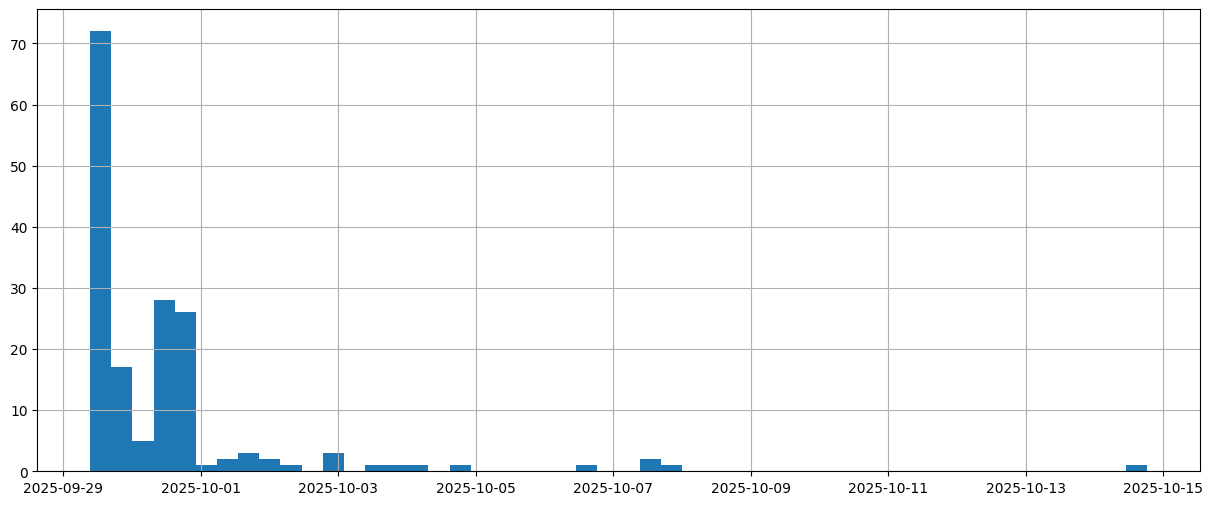

In [75]:
df_fall_2025["Timestamp"].hist(figsize=(15, 6), bins=50)
print("Most people submitted the form right when it dropped on September 29th, and again for the next class period I'm guessing. Then for the 30th's class as well, I'm guessing.")
print("Someone submitted like on the 14th, outlier; this is acceptable though.")

In [76]:
print(df_fall_2025.groupby("What year are you?").size())
print("Most people are juniors, some are sophomores or seniors, and barely any were other (freshman).")

What year are you?
Junior      119
Other         1
Senior       23
Sophmore     26
dtype: int64
Most people are juniors, some are sophomores or seniors, and barely any were other (freshman).


How old are you?
18      4
19     29
20     90
21     30
22     12
23      1
24      1
27      1
50+     1
dtype: int64
Most people are 19, 20, 21, or 22. Barely any were 18, 23, 24, 27, or 50+.


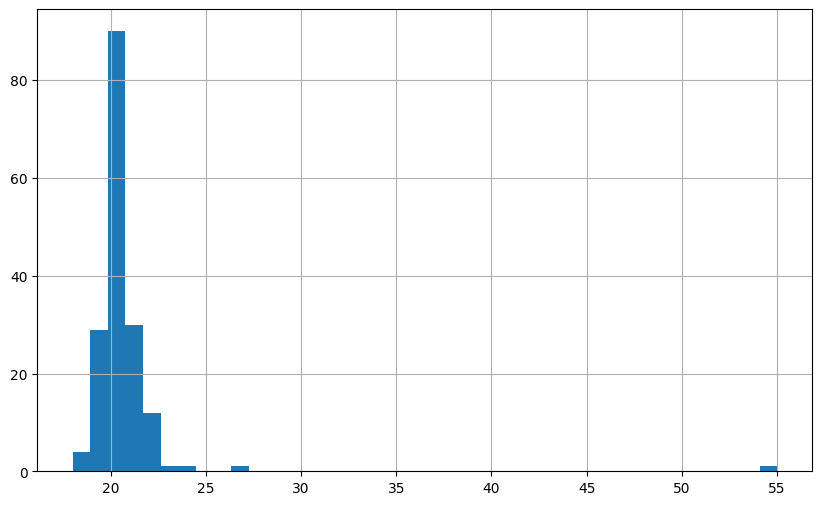

In [ ]:
print(df_fall_2025.groupby("How old are you?").size())
df_fall_2025_age_distribution = df_fall_2025["How old are you?"].apply(lambda x: 55 if str(x) == "50+" else x).astype(int)
df_fall_2025_age_distribution.hist(bins=40, figsize=(10, 6))
print("Most people are 19, 20, 21, or 22. Barely any were 18, 23, 24, 27, or 50+.")
print("The person who was 50+ is an outlier, but this should be okay.")

In [78]:
print(df_fall_2025.groupby("You could describe the adults you grew up with as...").size())

You could describe the adults you grew up with as...
Don't know / It's complicated    17
Mildly conservative              36
Mildly liberal                   52
Neutral                          36
Strongly conservative            14
Strongly liberal                 14
dtype: int64


In [79]:
print(df_fall_2025.groupby("You could describe yourself as...").size())

You could describe yourself as...
Don't know / It's complicated     5
Mildly conservative              17
Mildly liberal                   60
Neutral                          38
Strongly conservative             5
Strongly liberal                 44
dtype: int64


In [80]:
print(df_fall_2025.groupby("Do you attend church?").size())

Do you attend church?
Frequently     14
Never         141
Often          14
dtype: int64


In [81]:
print(df_fall_2025.groupby("Do your parents attend church?").size())

Do your parents attend church?
Frequently     27
Never         122
Often          20
dtype: int64


In [82]:
print(df_fall_2025.groupby("Do you watch sports?").size())

Do you watch sports?
Frequently    56
Never         62
Often         51
dtype: int64


In [83]:
print(df_fall_2025.groupby("Do your parents watch sports?").size())

Do your parents watch sports?
Frequently    39
Never         63
Often         67
dtype: int64


In [84]:
print(df_fall_2025.groupby("What bests represents your gender?").size())

What bests represents your gender?
Female     43
Male      126
dtype: int64


In [85]:
print(df_fall_2025.groupby("My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?").size())

My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?
Mildly a jerk      86
Not a jerk         78
Strongly a jerk     5
dtype: int64


In [86]:
print(df_fall_2025.groupby("My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?").size())

My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?
Mildly a jerk      62
Not a jerk         79
Strongly a jerk    28
dtype: int64


In [87]:
print(df_fall_2025.groupby("I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?").size())

I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?
Mildly a jerk      76
Not a jerk         56
Strongly a jerk    37
dtype: int64


In [88]:
print(df_fall_2025.groupby("My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well.").size())

My wife and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My wife's son currently goes to a much less nice public school. My wife says I'm a jerk for not paying for her daughter to go to private school as well.
Mildly a jerk      60
Not a jerk         74
Strongly a jerk    35
dtype: int64


In [89]:
print(df_fall_2025.groupby("I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?").size())

I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?
Mildly a jerk      51
Not a jerk         68
Strongly a jerk    50
dtype: int64


In [90]:
print(df_fall_2025.groupby("My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?").size())

My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?
Mildly a jerk       40
Not a jerk         117
Strongly a jerk     12
dtype: int64


In [91]:
print(df_fall_2025.groupby("My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?").size())

My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says "nephew loves you so much" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?
Mildly a jerk      58
Not a jerk         27
Strongly a jerk    83
dtype: int64


In [92]:
print(df_fall_2025.groupby("I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?").size())

I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?
Mildly a jerk      50
Not a jerk         93
Strongly a jerk    25
dtype: int64


In [93]:
print(df_fall_2025.groupby("I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?").size())

I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?
Mildly a jerk      51
Not a jerk         99
Strongly a jerk    18
dtype: int64


In [94]:
print(df_fall_2025.groupby("One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?").size())

One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?
Mildly a jerk      69
Not a jerk         58
Strongly a jerk    41
dtype: int64


In [95]:
print(df_fall_2025.groupby("I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?").size())

I was in a conflict with my mother-in-law's boyfriend, in which I made a snide comment about he's never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he'd sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?
Mildly a jerk       49
Not a jerk         100
Strongly a jerk     19
dtype: int64


In [96]:
print(df_fall_2025.groupby("\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?").size())

\nSome of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?
Mildly a jerk       45
Not a jerk         108
Strongly a jerk     15
dtype: int64


In [97]:
print(df_fall_2025.groupby("My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?").size())

My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?
Mildly a jerk      57
Not a jerk         15
Strongly a jerk    96
dtype: int64


In [98]:
print(df_fall_2025.groupby("My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?").size())

My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?
Mildly a jerk      59
Not a jerk         27
Strongly a jerk    82
dtype: int64


In [99]:
df_fall_2025["My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn\'t comfortable with that, but she says \"nephew loves you so much\" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn\'t mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?"].fillna("Strongly a jerk")
df_fall_2025["I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?"].fillna("Not a jerk")
df_fall_2025["I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child\'s mother to make sure she\'s paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn\'t show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jerk?"].fillna("Not a jerk")
df_fall_2025["One of my children wants to go to an expensive school to become a dentist. I told them I\'d be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn\'t pay for her schooling unless she picked a career path that will make at least 100,000 a year. Am I a jerk?"].fillna("Mildly a jerk")
df_fall_2025["I was in a conflict with my mother-in-law\'s boyfriend, in which I made a snide comment about he\'s never paid child support to his ex. Later, he called me and told me if I ever said anything like that ever again he\'d sue me for defamation. I took the threat seriously, as he is a lawyer, and uninvited him for our wedding and told my family I couldn\'t be around him anymore. Am I a jerk?"].fillna("Not a jerk")
df_fall_2025["\nSome of my relatives refuse to come to my wedding, since they don\'t approve of our \'lifestyle\'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?"].fillna("Not a jerk")
df_fall_2025["My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I a jerk?"].fillna("Strongly a jerk")
df_fall_2025["My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn\'t look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn\'t be in the wedding party. Am I a jerk?"].fillna("Strongly a jerk")

0      Strongly a jerk
1      Strongly a jerk
2      Strongly a jerk
3      Strongly a jerk
4      Strongly a jerk
            ...       
164    Strongly a jerk
165         Not a jerk
166      Mildly a jerk
167    Strongly a jerk
168      Mildly a jerk
Name: My sister is going to be a bridesmaid at my wedding. Her hair was dyed, but she recently decided to grow it out, so parts of it are bleached and part are not. I told her it wouldn't look good in the pictures, and offered to pay for her to dye it. She said no, and I said she couldn't be in the wedding party. Am I a jerk?, Length: 169, dtype: object

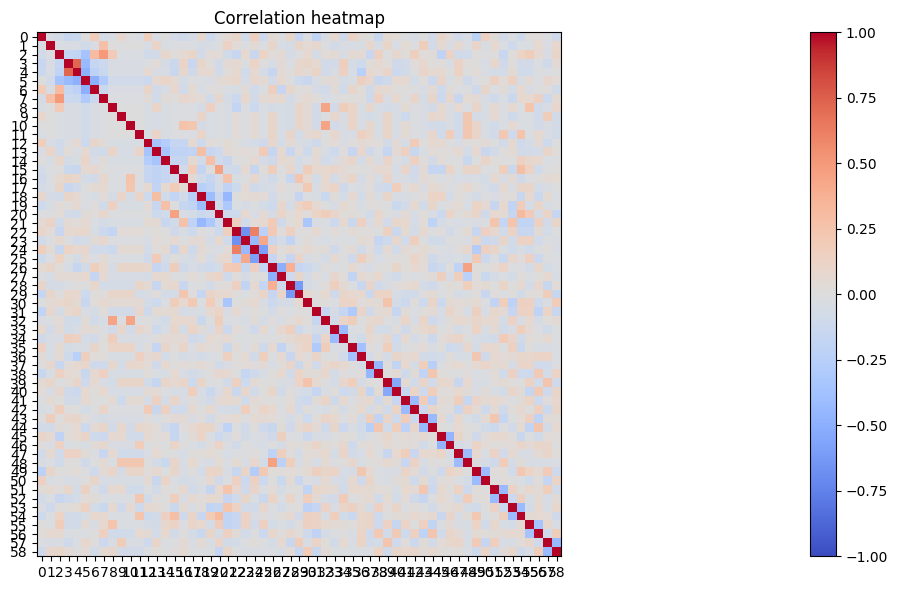

In [125]:
import matplotlib.pyplot as plt
import numpy as np

df_fall_2025_one_hot_encoded = pd.get_dummies(df_fall_2025, drop_first = True)
corr_mat = df_fall_2025_one_hot_encoded.corr()

fig, ax = plt.subplots(figsize=(50, 6))
ax.set_xticks(np.arange(len(corr_mat.columns)))
ax.set_yticks(np.arange(len(corr_mat.columns)))
plt.colorbar(ax.imshow(corr_mat, cmap="coolwarm", vmin=-1, vmax=1), ax=ax)
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

### One of the questions have been primed

# Testing theories

In [128]:

from scipy import stats

print("There are not really any colinear variables in our one-hot encoded dataset.")
print("The only thing is questions 3 and 4, 'You would describe the adults you grew up with as...' and 'You would describe yourself as...' are pretty similar.")
print("These two variables being similar is to be expected.")
print("We can use a chi-squared test to test whether they are actually independent.")
table = pd.crosstab(df_fall_2025["You could describe the adults you grew up with as..."], df_fall_2025["You could describe yourself as..."])
chi2, p, dof, expected = stats.chi2_contingency(table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
print("Since our resulting p-value is <= 0.05, we reject the null hypothesis that a child's political beliefs are influenced by their parents' political beliefs.")
print("Again, this is expected because there are MANY confounding variables that affect both of these variables.")

There are not really any colinear variables in our one-hot encoded dataset.
The only thing is questions 3 and 4, 'You would describe the adults you grew up with as...' and 'You would describe yourself as...' are pretty similar.
These two variables being similar is to be expected.
We can use a chi-squared test to test whether they are actually independent.
Chi-square statistic: 111.30622569867927
p-value: 7.331147378552827e-13
Degrees of freedom: 25
Expected frequencies:
 [[ 0.50295858  1.71005917  6.03550296  3.82248521  0.50295858  4.4260355 ]
 [ 1.06508876  3.62130178 12.78106509  8.09467456  1.06508876  9.37278107]
 [ 1.53846154  5.23076923 18.46153846 11.69230769  1.53846154 13.53846154]
 [ 1.06508876  3.62130178 12.78106509  8.09467456  1.06508876  9.37278107]
 [ 0.41420118  1.40828402  4.9704142   3.14792899  0.41420118  3.64497041]
 [ 0.41420118  1.40828402  4.9704142   3.14792899  0.41420118  3.64497041]]
Since our resulting p-value is <= 0.05, we reject the null hypothesis tha

In [135]:
print("I also want to see what ordinal question responses that a person's gender affects.")
for i in range(10, len(df_fall_2025.columns)):
    table = pd.crosstab(df_fall_2025["What bests represents your gender?"], df_fall_2025.iloc[:, i])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f"Column: {list(df_fall_2025.columns)[i]}")
    # print("Chi-square statistic:", chi2)
    print("p-value:", p)
    # print("Degrees of freedom:", dof)
    # print("Expected frequencies:\n", expected)
print("We can reject the null hypothesis for the following columns:")
print("Lost cat, conflict with mother-in-law's boyfriend, relative refuse to come to LGBTQ wedding, sister being bridesmaid at wedding.")

I also want to see what ordinal question responses that a person's gender affects.
Column: My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?
p-value: 0.9605165777544047
Column: My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?
p-value: 0.314

In [ ]:
print("I also want to see what ordinal question responses that a person's age affects.")
for i in range(10, len(df_fall_2025.columns)):
    table = pd.crosstab(df_fall_2025["How old are you?"], df_fall_2025.iloc[:, i])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f"Column: {list(df_fall_2025.columns)[i]}")
    # print("Chi-square statistic:", chi2)
    print("p-value:", p)
    # print("Degrees of freedom:", dof)
    # print("Expected frequencies:\n", expected)
print("We can reject the null hypothesis for the following columns:")
print("Girlfriend's ibuprofen, trust fund kid, child with negligent mother.")

I also want to see what ordinal question responses that a person's age affects.
Column: My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?
p-value: 3.833642303488909e-09
Column: My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?
p-value: 0.614

In [ ]:
print("I also want to see what ordinal question responses that a person's year in school affects.")
for i in range(10, len(df_fall_2025.columns)):
    table = pd.crosstab(df_fall_2025["What year are you?"], df_fall_2025.iloc[:, i])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f"Column: {list(df_fall_2025.columns)[i]}")
    # print("Chi-square statistic:", chi2)
    print("p-value:", p)
    # print("Degrees of freedom:", dof)
    # print("Expected frequencies:\n", expected)
print("This was weaker correlation than a person's age: we failed to reject the null hypotheses for all columns in the dataset.")

I also want to see what ordinal question responses that a person's year in school affects.
Column: My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?
p-value: 0.8079592424268096
Column: My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?
p-valu

In [ ]:
print("I also want to see what ordinal question responses that a person's time of response affects.")
for i in range(10, len(df_fall_2025.columns)):
    table = pd.crosstab(pd.to_datetime(df_fall_2025["Timestamp"]), df_fall_2025.iloc[:, i])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f"Column: {list(df_fall_2025.columns)[i]}")
    # print("Chi-square statistic:", chi2)
    print("p-value:", p)
    # print("Degrees of freedom:", dof)
    # print("Expected frequencies:\n", expected)

I also want to see what ordinal question responses that a person's time of response affects.
Column: My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?
p-value: 0.4590976395495629
Column: My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?
p-va

TypeError: unsupported operand type(s) for +: 'DataFrameGroupBy' and 'list'